**Name: Kwok Tsz Yi    Student ID: p233340**

In [69]:
#Import Python libaries
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [70]:
#Load movielens data

#Users
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=users_cols, parse_dates=True) 
users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [71]:
#Movies
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('u.item', sep='|', names=movie_cols, usecols=range(5),encoding='latin-1')
movies

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...


In [72]:
#Ratings
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=rating_cols)
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [73]:
#Merging movie data with their ratings
movie_ratings = pd.merge(movies, ratings)
movie_ratings

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324
...,...,...,...,...,...,...,...,...
99995,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,863,1,889289570
99996,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,863,3,889289491
99997,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),863,2,889289570
99998,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,896,3,887160722


In [74]:
#merging movie_ratings data with the User's dataframe
df = pd.merge(movie_ratings, users)
df

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Peacemaker%2C...,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,893286511,19,M,student,56567


In [75]:
#pre-processing
#dropping colums that aren't needed
df.drop(columns=['video_release_date','imdb_url','unix_timestamp'], axis=1, inplace=True)
df

,movie_id,title,release_date,user_id,rating,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,308,4,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,308,5,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,308,4,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,308,4,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,308,5,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,729,4,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,729,3,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,729,3,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,729,1,19,M,student,56567


In [76]:
ratings.drop(columns=['unix_timestamp'], inplace = True, axis = 1 ) 
ratings

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [77]:
movies.drop(columns=['video_release_date','imdb_url'], inplace = True, axis = 1 )
movies

,movie_id,title,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995
...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998
1678,1679,B. Monkey (1998),06-Feb-1998
1679,1680,Sliding Doors (1998),01-Jan-1998
1680,1681,You So Crazy (1994),01-Jan-1994


In [78]:
#Pivot Table(This creates a matrix of users and movie_ratings)
ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#Pearson Correlation Similarity (Creates a matrix of similaraties ..... which is the pairwise distances
# between two items )

movie_similarity = 1 - pairwise_distances( ratings_matrix, metric="correlation" )
np.fill_diagonal( movie_similarity, 0 ) 
ratings_matrix = pd.DataFrame( movie_similarity )
ratings_matrix

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.234595,0.193362,0.226213,0.128840,0.015113,0.347354,0.254490,0.209502,0.104655,...,0.018215,-0.029676,-0.029676,-0.029676,0.018215,-0.029676,-0.029676,-0.029676,0.034179,0.034179
1,0.234595,0.000000,0.190649,0.409044,0.240712,0.030062,0.220022,0.206020,0.077894,0.072906,...,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,-0.012451,0.071415,0.071415
2,0.193362,0.190649,0.000000,0.227849,0.141368,0.065347,0.258855,0.078636,0.146181,0.079608,...,-0.009764,-0.009764,-0.009764,-0.009764,0.023964,-0.009764,-0.009764,-0.009764,-0.009764,0.091421
3,0.226213,0.409044,0.227849,0.000000,0.237298,0.021878,0.295489,0.352800,0.229922,0.138220,...,-0.016619,-0.016619,0.088984,0.088984,0.025622,-0.016619,-0.016619,-0.016619,0.046743,0.067863
4,0.128840,0.240712,0.141368,0.237298,0.000000,-0.008594,0.205289,0.145866,0.142541,-0.033746,...,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,-0.009889,0.088618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,-0.029676,-0.012451,-0.009764,-0.016619,-0.009889,-0.005159,-0.026036,-0.017230,-0.021125,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,0.000000,1.000000,1.000000,-0.001062,-0.001062
1678,-0.029676,-0.012451,-0.009764,-0.016619,-0.009889,-0.005159,-0.026036,-0.017230,-0.021125,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,1.000000,0.000000,1.000000,-0.001062,-0.001062
1679,-0.029676,-0.012451,-0.009764,-0.016619,-0.009889,-0.005159,-0.026036,-0.017230,-0.021125,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,1.000000,1.000000,0.000000,-0.001062,-0.001062
1680,0.034179,0.071415,-0.009764,0.046743,-0.009889,-0.005159,0.039920,0.075617,0.047273,-0.010138,...,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,-0.001062,0.000000,-0.001062


In [80]:
#Recommender
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp="Mission: Impossible (1996)"
    inp=movies[movies['title']==user_inp].index.tolist()
    inp=inp[0]
    
    movies['similarity'] = ratings_matrix.iloc[inp]
    
except:
    print("No such movies is found!")
    
print("We recommend the following 5 movies based on your choice of ",user_inp ,": \n", movies.sort_values( ["similarity"], ascending = False )[1:6])

We recommend the following 5 movies based on your choice of  Mission: Impossible (1996) : 
      movie_id                      title release_date  similarity
596       597              Eraser (1996)  21-Jun-1996    0.577604
116       117           Rock, The (1996)  07-Jun-1996    0.567405
545       546        Broken Arrow (1996)  09-Feb-1996    0.543275
117       118             Twister (1996)  10-May-1996    0.542379
684       685  Executive Decision (1996)  09-Mar-1996    0.493904


# Collaborative Filtering Performance Evaluation

In [81]:
!pip install scikit-surprise

In [82]:
#Import Python libraries
import pandas as pd
from surprise import KNNWithMeans
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [83]:
# download MovieLens 100K data from http://files.grouplens.org/datasets/movielens/ml-100k.zip
import requests, zipfile, io

r = requests.get('http://files.grouplens.org/datasets/movielens/ml-100k.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [84]:
# Load the movielens-100k dataset from current directory
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file('./ml-100k/u.data', reader=reader)

In [85]:
# Load the movielens-100k dataset from current directory
data_1 = Dataset.load_builtin('ml-100k')

In [86]:
data.raw_ratings

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013'),
 ('62', '257', 2.0, '879372434'),
 ('286', '1014', 5.0, '879781125'),
 ('200', '222', 5.0, '876042340'),
 ('210', '40', 3.0, '891035994'),
 ('224', '29', 3.0, '888104457'),
 ('303', '785', 3.0, '879485318'),
 ('122', '387', 5.0, '879270459'),
 ('194', '274', 2.0, '879539794'),
 ('291', '1042', 4.0, '874834944'),
 ('234', '1184', 2.0, '892079237'),
 ('119', '392', 4.0, '886176814'),
 ('167', '486', 4.0, '892738452'),
 ('299', '144', 4.0, '877881320'),
 ('291', '118', 2.0, '874833878'),
 ('308', '1', 4.0, '887736532'),
 ('95', '546', 2.0, '879196566'),
 ('38', '95', 5.0, '892430094'),
 ('102', '768', 2.0, '883748450'),
 ('63', '277', 4.0, '875747401

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9794
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9591
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9502
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9496
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9500


<Axes: >

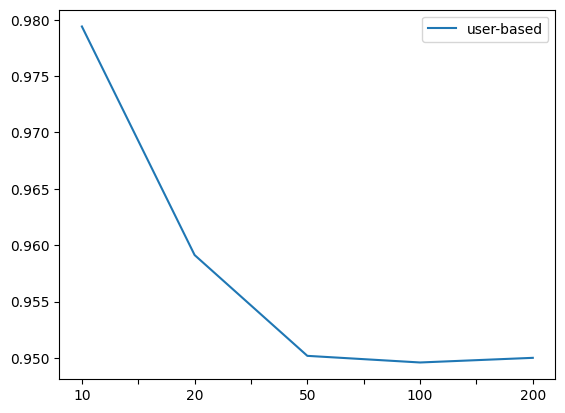

In [87]:
train_set, test_set = train_test_split(data, test_size=0.30)

K = [10, 20, 50, 100, 200]

result = pd.DataFrame(index=['10','20','50','100','200'],columns=['user-based'])

for x in K:
    algo = KNNWithMeans(k=x, sim_options={
        "name": "pearson",
      "user_based": True,
    })

    algo.fit(train_set)
    predictions = algo.test(test_set)

    result.at[str(x), 'user-based'] = accuracy.rmse(predictions, verbose=True)

result.plot()

**Question 1: Add item-based collaborative filtering using the previous code block.**

Computing the pearson similarity matrix...
Done computing similarity matrix.
User-based collaborative filtering RMSE:  0.979403665799128
Computing the pearson similarity matrix...
Done computing similarity matrix.
Item-based collaborative filtering RMSE:  0.9811329473581564
Computing the pearson similarity matrix...
Done computing similarity matrix.
User-based collaborative filtering RMSE:  0.9591244796745219
Computing the pearson similarity matrix...
Done computing similarity matrix.
Item-based collaborative filtering RMSE:  0.9553289885259292
Computing the pearson similarity matrix...
Done computing similarity matrix.
User-based collaborative filtering RMSE:  0.950181391065744
Computing the pearson similarity matrix...
Done computing similarity matrix.
Item-based collaborative filtering RMSE:  0.9424217417833085
Computing the pearson similarity matrix...
Done computing similarity matrix.
User-based collaborative filtering RMSE:  0.9495935419158055
Computing the pearson similarity mat

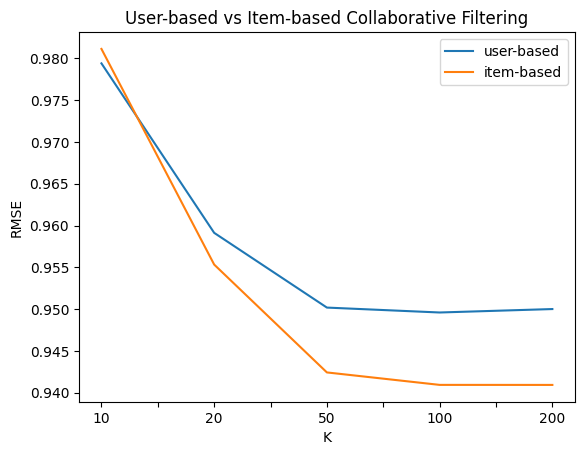

In [89]:
K = [10, 20, 50, 100, 200]

result = pd.DataFrame(index=['10','20','50','100','200'],columns=['user-based', 'item-based'])

for x in K:
    # User-based collaborative filtering
    algo_user = KNNWithMeans(k=x, sim_options={
        "name": "pearson",
        "user_based": True,
    })
    algo_user.fit(train_set)
    predictions_user = algo_user.test(test_set)
    result.at[str(x), 'user-based'] = accuracy.rmse(predictions_user, verbose=False)
    print("User-based collaborative filtering RMSE: ", accuracy.rmse(predictions_user, verbose=False))

    # Item-based collaborative filtering
    algo_item = KNNWithMeans(k=x, sim_options={
        "name": "pearson",
        "user_based": False,
    })
    algo_item.fit(train_set)
    predictions_item = algo_item.test(test_set)
    result.at[str(x), 'item-based'] = accuracy.rmse(predictions_item, verbose=False)
    print("Item-based collaborative filtering RMSE: ", accuracy.rmse(predictions_item, verbose=False))

result.plot()
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('User-based vs Item-based Collaborative Filtering')
plt.legend()
plt.show()

**Question 2: Which one performs better? user-based or item-based CF? Why?**

Answer 2:

The item-based collaborative filtering performs better, as general speacking it has a lower RMSE than the user-based collabrative filtering. The reason is that the item-based collaborative filtering is more stable and less sensitive to the changes in the user's rating. The user-based collaborative filtering is more sensitive to the changes in the user's rating, and it is more likely to be affected by the outliers.